In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


In [82]:
# Load the CSV file
file_path = './graph_embeddings_labels.csv'  # Update the path if needed
df = pd.read_csv(file_path)
df

,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,...,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,embedding_128,label
0,-0.372614,-0.030603,0.495528,0.886127,0.100768,0.138769,0.893264,0.328006,-0.201871,-0.201426,...,0.033629,0.497074,-0.079357,0.291910,-0.310185,-0.134115,0.573581,-0.414679,0.610278,Trojan
1,-0.372614,-0.030603,0.495528,0.886127,0.100768,0.138769,0.893264,0.328006,-0.201871,-0.201426,...,0.033629,0.497074,-0.079357,0.291910,-0.310185,-0.134115,0.573581,-0.414679,0.610278,Virus
2,-0.561592,0.817666,-0.544812,0.767392,-0.961792,-0.085747,-0.397372,0.438733,-0.338129,0.027864,...,0.055654,0.364787,0.083622,0.703245,1.206971,-0.485569,-0.035420,-0.122132,-0.166283,Trojan
3,-0.561592,0.817666,-0.544812,0.767392,-0.961792,-0.085747,-0.397372,0.438733,-0.338129,0.027864,...,0.055654,0.364787,0.083622,0.703245,1.206971,-0.485569,-0.035420,-0.122132,-0.166283,Worm
4,-0.561592,0.817666,-0.544812,0.767392,-0.961792,-0.085747,-0.397372,0.438733,-0.338129,0.027864,...,0.055654,0.364787,0.083622,0.703245,1.206971,-0.485569,-0.035420,-0.122132,-0.166283,Virus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.302601,1.070248,0.403903,0.441284,-1.112386,-0.561860,0.448673,0.439048,0.199947,0.267812,...,0.565067,0.154826,0.082342,0.112212,0.614443,0.056219,0.138101,-1.137513,0.325497,Unknown
141,0.385883,-0.083456,-0.246556,0.477957,-0.177268,-0.169738,0.251050,0.086222,-0.589123,-0.082718,...,-0.169563,0.086833,0.133747,-0.231593,0.207312,0.044416,-0.024671,-0.173800,0.087638,Cryptocurrency Miner
142,0.389573,-0.104353,-0.231249,0.456599,-0.213745,-0.185028,0.255397,0.101855,-0.610960,-0.072350,...,-0.143008,0.098296,0.143998,-0.210448,0.207603,0.077807,-0.028348,-0.176765,0.072149,Cryptocurrency Miner
143,0.080801,0.600072,0.725117,0.612089,-0.726759,-0.880774,0.072993,0.756354,0.391441,0.945293,...,-0.631586,0.224892,0.749998,-0.651056,1.150585,0.012683,0.789442,-0.903163,0.368252,Cryptocurrency Miner


In [83]:
first_row = df.iloc[0]
first_row_1=first_row.drop('label')
print(first_row_1)
type(first_row_1)


embedding_1     -0.372614
embedding_2     -0.030603
embedding_3      0.495528
embedding_4      0.886127
embedding_5      0.100768
                   ...   
embedding_124   -0.310185
embedding_125   -0.134115
embedding_126    0.573581
embedding_127   -0.414679
embedding_128    0.610278
Name: 0, Length: 128, dtype: object


pandas.core.series.Series

In [84]:
# ============================
# 1. Data Preparation
# ============================

# Separate features (X) and labels (y)
X = df.drop(columns=['label']).values
y = df['label'].values

# Encode labels into numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert labels to one-hot encoding
y_one_hot = to_categorical(y_encoded)

In [ ]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=40)

# Fit and transform the scaled training features using pca
X= pca.fit_transform(X)

# Fit and transform the scaled test features using pca
# test_pca = pca.transform(scaled_test_features)

In [99]:
# ============================
# 2. Train-Test Split
# ============================

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, 
    test_size=0.2, 
    random_state=42 
)

In [100]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 40), (29, 40), (116, 10), (29, 10))

In [101]:
# ============================
# 3. Build and Train the Model
# ============================

# Define the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Input layer matching number of features
model.add(Dense(64, activation='relu'))       # Hidden layer 1
model.add(Dense(32, activation='relu'))       # Hidden layer 2
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Output layer

In [102]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [103]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
4/4 [==============================] - 0s 38ms/step - loss: 2.2812 - accuracy: 0.3362 - val_loss: 2.2384 - val_accuracy: 0.3448
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 2.1790 - accuracy: 0.3879 - val_loss: 2.1711 - val_accuracy: 0.4483
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 2.0913 - accuracy: 0.4483 - val_loss: 2.1106 - val_accuracy: 0.4483
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 2.0112 - accuracy: 0.4741 - val_loss: 2.0519 - val_accuracy: 0.4483
Epoch 5/20
4/4 [==============================] - 0s 8ms/step - loss: 1.9349 - accuracy: 0.4741 - val_loss: 1.9948 - val_accuracy: 0.4483
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 1.8571 - accuracy: 0.4914 - val_loss: 1.9404 - val_accuracy: 0.5172
Epoch 7/20
4/4 [==============================] - 0s 8ms/step - loss: 1.7825 - accuracy: 0.5345 - val_loss: 1.8868 - val_accuracy: 0.4828
Epoch 8/20
4/4 [=================

In [104]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.5114
Test Accuracy: 0.5172


In [105]:
output_values = model.predict(X_test)

print("Output values for the new inputs:")
print(output_values[3])
for i in output_values[10]:
    print(f"{i:.2f}")

1/1 [==============================] - 0s 40ms/step
Output values for the new inputs:
[0.5246454  0.27671847 0.91671425 0.22464931 0.39674896 0.2155149
 0.6051051  0.50634104 0.59266347 0.4058867 ]
0.17
0.26
0.68
0.26
0.20
0.21
0.72
0.49
0.77
0.69


In [ ]:
first_row = X.iloc[0]
# first_row_1=first_row.drop('label')
print(first_row_1)
type(first_row_1)

In [112]:
# Convert the first row (dropping the label) to a NumPy array and ensure the correct data type
first_row_input = np.array(first_row_1, dtype=np.float32).reshape(1, -1)

# Predict the output values for the first row
output_values = model.predict(first_row_input)

# Print the output values for the new input
print("Output values for the new input:")
for label, probability in zip(label_encoder.classes_, output_values[0]):
    print(f"{label}: {probability * 100:.2f}%")


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_8/dense_24/Relu' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/home/ndv/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/ndv/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "/home/ndv/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/ndv/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/ndv/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ndv/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ndv/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ndv/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_17205/3812811520.py", line 5, in <module>
      output_values = model.predict(first_row_input)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/ndv/.local/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_8/dense_24/Relu'
Matrix size-incompatible: In[0]: [1,128], In[1]: [40,64]
	 [[{{node sequential_8/dense_24/Relu}}]] [Op:__inference_predict_function_19412]

In [107]:
# Print the percentages for another sample (e.g., sample 10)
sample_index = 28 # Index of another sample you want to print
predicted_probabilities = output_values[sample_index]

print(f"\nOutput values for test sample index {sample_index}:")
for label, probability in zip(label_encoder.classes_, predicted_probabilities):
    print(f"{label}: {probability * 100:.2f}%")


Output values for test sample index 28:
Adware: 26.63%
Backdoor: 23.41%
Cryptocurrency Miner: 94.61%
Dropper: 16.15%
Phishing: 24.69%
Ransomware: 16.07%
Trojan: 52.29%
Unknown: 34.39%
Virus: 68.59%
Worm: 36.65%


Text(0.5, 0, 'Principal Component #')

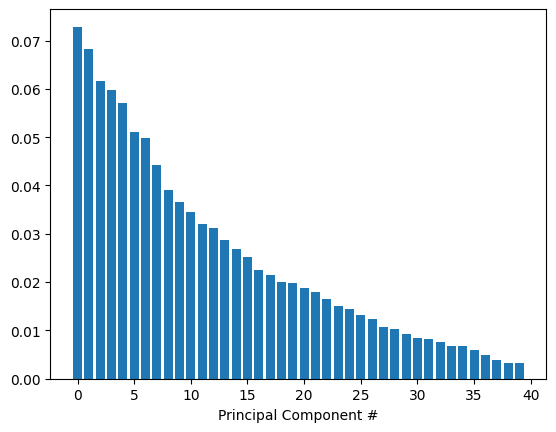

In [108]:
# This is just to make plots appear in the notebook
# %matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
exp_variance = pca.explained_variance_ratio_
#print(exp_variance)
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

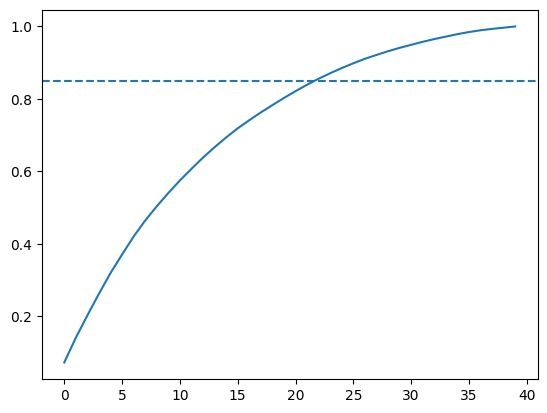

In [109]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [111]:
X.shape

(145, 40)